In [1]:
import pandas as pd 
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import re

## Read the sport category

In [2]:
filtered_df_sport_category = pd.read_parquet('filtered_sport_category_without_description_column_metadata.parquet')

In [3]:
eurocup_df = filtered_df_sport_category[
    filtered_df_sport_category.apply(lambda row: bool(re.search(r'\bUEFA Euro\b', row['tags'], re.IGNORECASE)) or bool(
        re.search(r'\bUEFA Euro\b', row['title'], re.IGNORECASE)), axis=1)
].copy()
eurocup_df

,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
82561,Sports,UCr1a3tkb3Q1HnOG_Af-UlGw,2019-11-03 23:24:15.938812,0.0,EXRRNSCiZ6U,247,30.0,"Ball Street,Football,Ian Wright,Kevin Gallache...",On Yer 'Ead,2015-06-22 00:00:00,788.0
82564,Sports,UCr1a3tkb3Q1HnOG_Af-UlGw,2019-11-03 23:24:08.147095,2.0,u8UYJxeX_gU,219,15.0,"Ball Street,Football,Scotland National Footbal...",A must win for both? | Republic Of Ireland v ...,2015-06-12 00:00:00,818.0
82580,Sports,UCr1a3tkb3Q1HnOG_Af-UlGw,2019-11-03 23:24:10.141685,0.0,KmpH6C8v2Z0,184,26.0,"Ian Wright (Football Player),Alex Oxlade-Chamb...",Mark of Kane? | England v Lithuania match prev...,2015-03-26 00:00:00,1557.0
82605,Sports,UCr1a3tkb3Q1HnOG_Af-UlGw,2019-11-03 23:24:16.850644,1.0,Gju1Jb2a43U,143,8.0,Republic Of Ireland National Football Team (Fo...,The Celtic derby | Scotland vs Ireland Match P...,2014-11-14 00:00:00,2053.0
82607,Sports,UCr1a3tkb3Q1HnOG_Af-UlGw,2019-11-03 23:24:08.874695,6.0,HodEI7Z26uc,287,53.0,"Wayne Rooney,England National Football Team (F...",Can Bale be better than Ronaldo? | Vauxhall Ho...,2014-11-13 00:00:00,1478.0
...,...,...,...,...,...,...,...,...,...,...,...
4301796,Sports,UCsaS5aZjlJPJCzNwjEc3waw,2019-10-31 12:55:24.539993,1.0,KO-pbEClKeI,168,9.0,"Scotland,Scotland National Team,Football,Women...",WU17s | UEFA Euro Qualifying Highlights | Scot...,2018-10-13 00:00:00,711.0
4302247,Sports,UCsaS5aZjlJPJCzNwjEc3waw,2019-10-31 12:55:31.786804,0.0,3uIvszUM-zU,717,31.0,"Scotland,Scotland National Team,Football,Gordo...",Gordon Strachan's Pre-Rep. of Ireland Press Co...,2014-11-13 00:00:00,5430.0
4302249,Sports,UCsaS5aZjlJPJCzNwjEc3waw,2019-10-31 12:55:32.954641,0.0,trO_TE6TPX4,299,11.0,"Scotland,Scotland National Team,Football,Shaun...",Maloney and McArthur discuss Irish strengths,2014-11-11 00:00:00,1460.0
4302261,Sports,UCsaS5aZjlJPJCzNwjEc3waw,2019-10-31 12:55:32.618970,41.0,lYLI71CZLss,254,593.0,"Scotland,Scotland National Team,Football,Polan...",HIGHLIGHTS // Poland 2-2 Scotland,2014-10-15 00:00:00,230869.0


In [4]:
eurocup_df['upload_date'] = pd.to_datetime(eurocup_df['upload_date'])

eurocup_df['year'] = eurocup_df['upload_date'].dt.year
eurocup_df['month'] = eurocup_df['upload_date'].dt.month
eurocup_df['day'] = eurocup_df['upload_date'].dt.day

# sort values by date
eurocup_df.sort_values(by='upload_date', inplace=True)
eurocup_df.reset_index(drop=True, inplace=True)

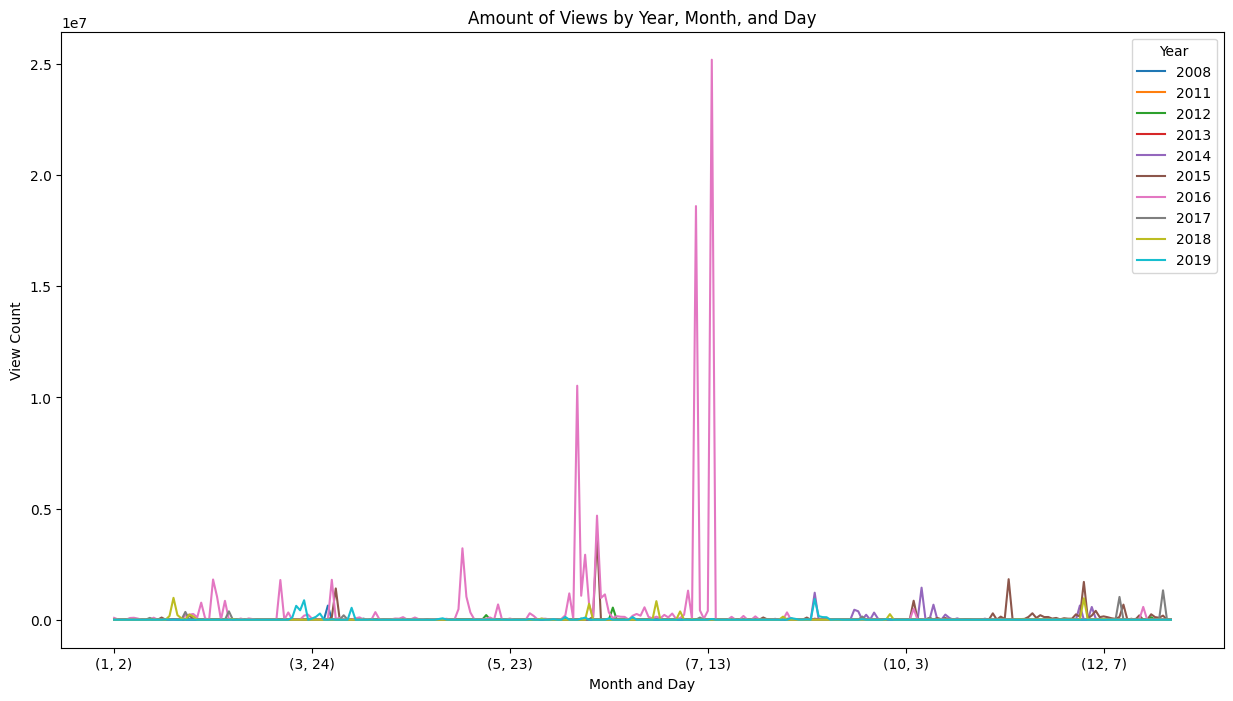

In [5]:

# Group by year, month, and day
grouped_df = eurocup_df.groupby(['year', 'month', 'day'])['view_count'].sum().reset_index()

# Pivot the table to have years as columns and months/days as rows
pivot_df = grouped_df.pivot_table(index=['month', 'day'], columns='year', values='view_count', fill_value=0)

# Plot the data
pivot_df.plot(kind='line', figsize=(15, 8))
plt.title('Amount of Views by Year, Month, and Day')
plt.xlabel('Month and Day')
plt.ylabel('View Count')
plt.legend(title='Year')
plt.show()

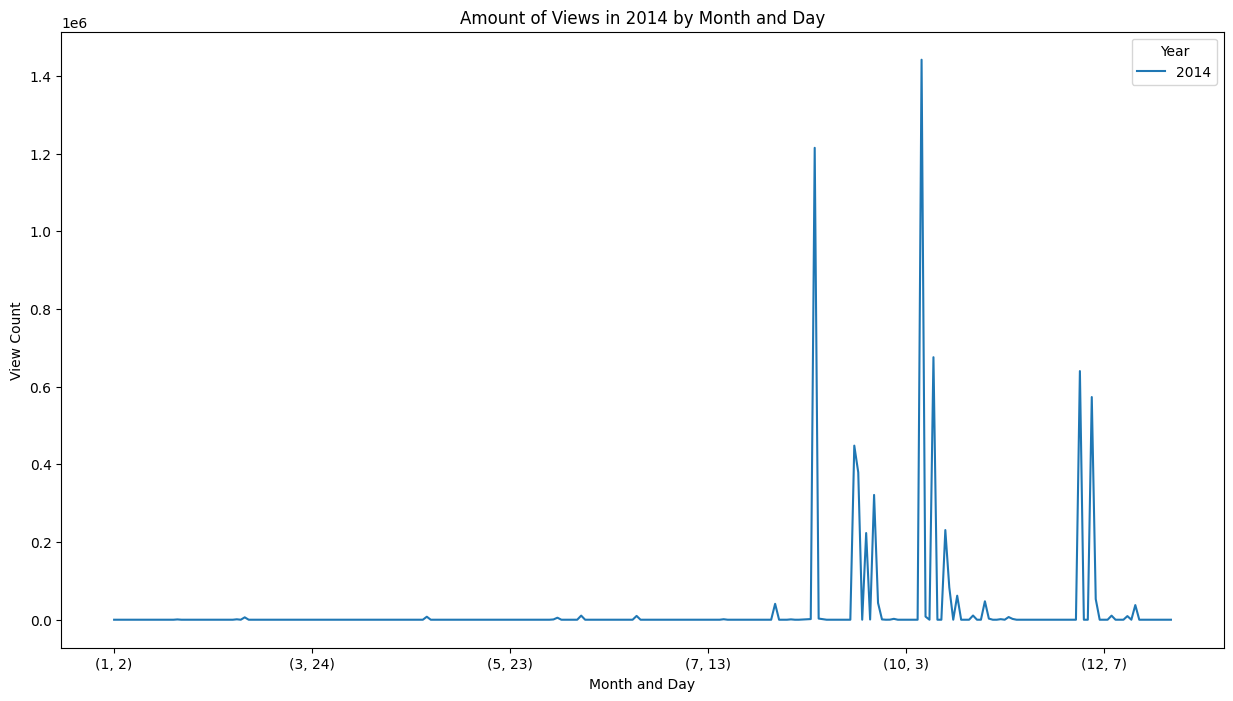

In [6]:
# Filter the pivot_df to include only the column for 2014
pivot_df_2014 = pivot_df[[2014]]

# Plot
pivot_df_2014.plot(kind='line', figsize=(15, 8))
plt.title('Amount of Views in 2014 by Month and Day')
plt.xlabel('Month and Day')
plt.ylabel('View Count')
plt.legend(title='Year')
plt.show()

## Read the filtered metadata by keywords

In [7]:
filtered_df_sport_category = pd.read_parquet('filtered_sport_metadata(by_tags_and_title)_without_description_column_and_gaming_category.parquet')

In [ ]:
keywords = ['football', 'soccer', 'fifa']

eurocup_df = filtered_df_sport_category[
    filtered_df_sport_category.apply(
        lambda row: 'eurocup' in row['title'].lower() or 'eurocup' in row['tags'].lower() and 
        (any(keyword in row['title'].lower() for keyword in keywords) or 
        any(keyword in row['tags'].lower() for keyword in keywords)), axis=1
    )
]
eurocup_df

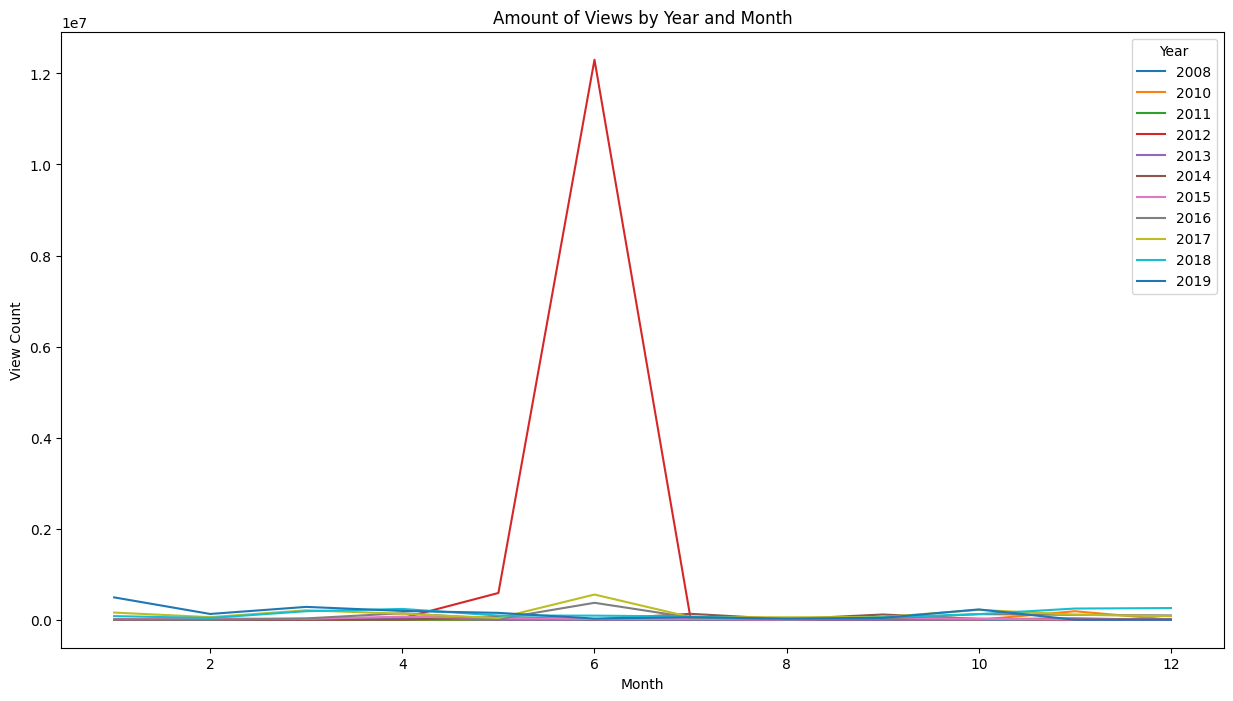

In [ ]:
# Group by year and month and sum the view counts
grouped_df = eurocup_df.groupby(['year', 'month'])['view_count'].sum().reset_index()

# Pivot the table to have years as columns and months as rows
pivot_df = grouped_df.pivot_table(index='month', columns='year', values='view_count', fill_value=0)

# Plot the data
pivot_df.plot(kind='line', figsize=(15, 8))
plt.title('Amount of Views by Year and Month')
plt.xlabel('Month')
plt.ylabel('View Count')
plt.legend(title='Year')
plt.show()

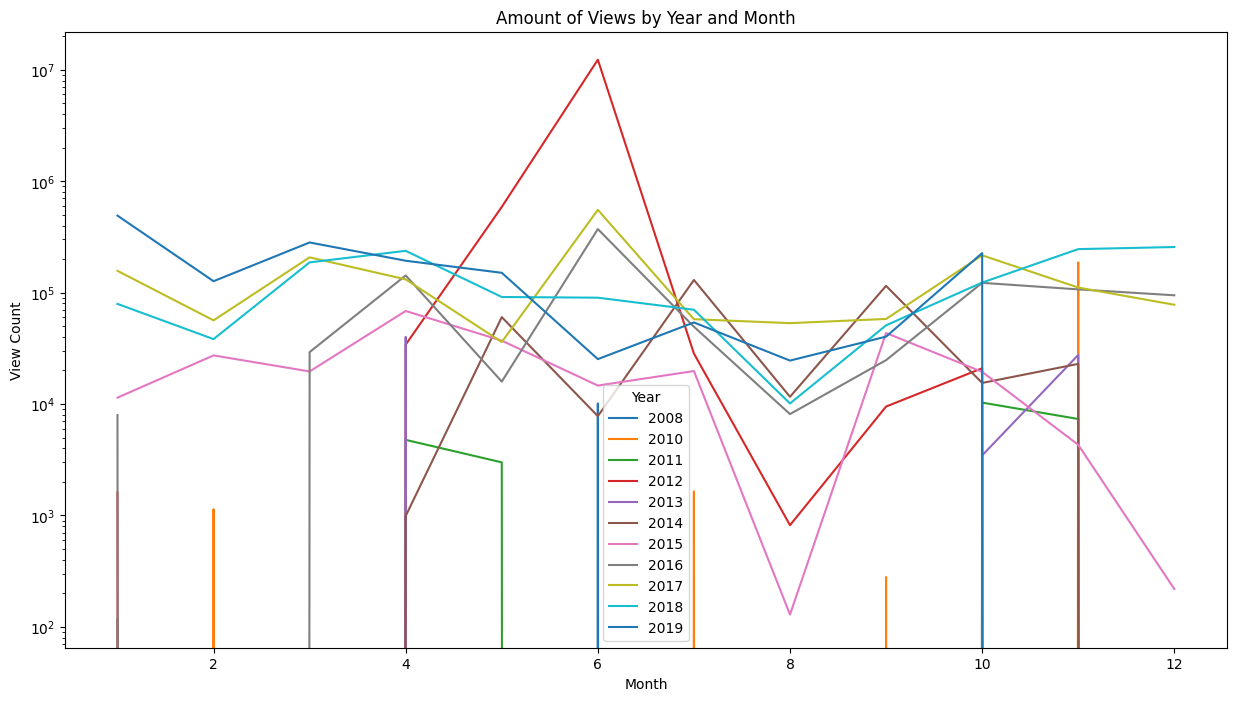

In [ ]:
# Group by year and month and sum the view counts
grouped_df = eurocup_df.groupby(['year', 'month'])['view_count'].sum().reset_index()

# Pivot the table to have years as columns and months as rows
pivot_df = grouped_df.pivot_table(index='month', columns='year', values='view_count', fill_value=0)

# Plot the data
pivot_df.plot(kind='line', figsize=(15, 8))
plt.title('Amount of Views by Year and Month')
plt.xlabel('Month')
plt.ylabel('View Count')
plt.yscale('log')
plt.legend(title='Year')
plt.show()

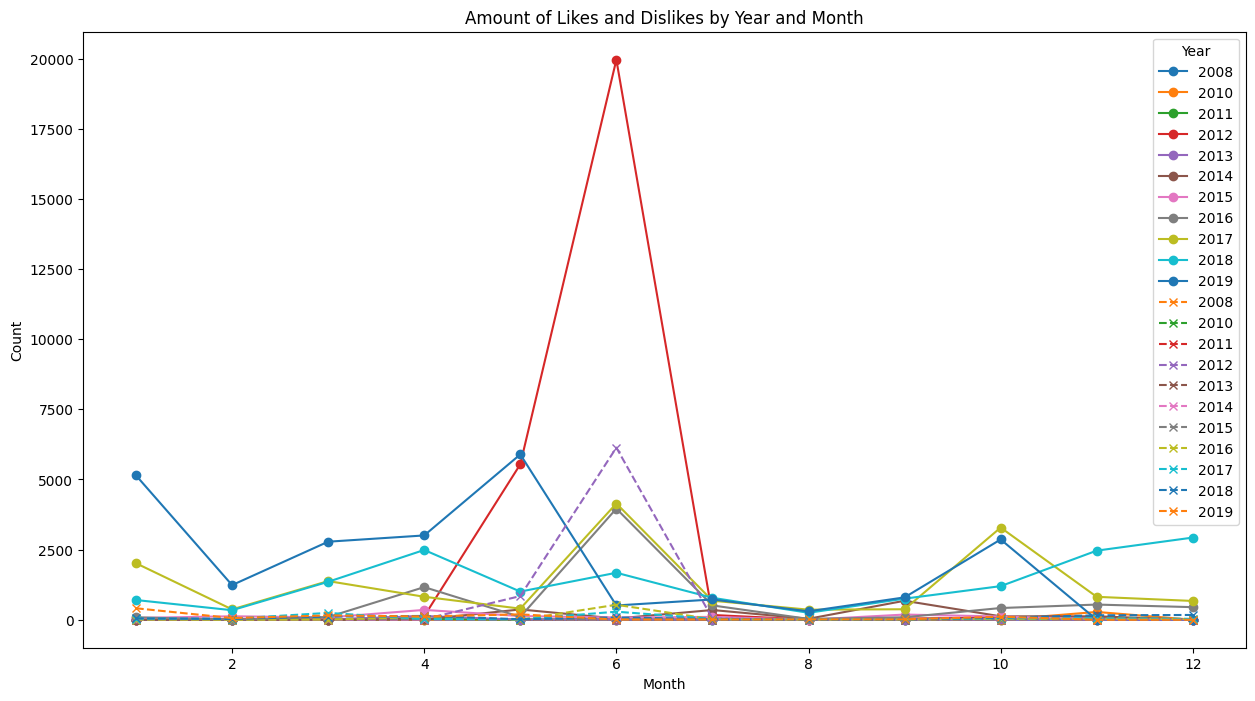

In [ ]:
# Group by year and month and sum the like and dislike counts
grouped_likes_dislikes_df = eurocup_df.groupby(['year', 'month'])[['like_count', 'dislike_count']].sum().reset_index()

# Pivot the table to have years as columns and months as rows for likes
pivot_likes_df = grouped_likes_dislikes_df.pivot_table(index='month', columns='year', values='like_count', fill_value=0)

# Pivot the table to have years as columns and months as rows for dislikes
pivot_dislikes_df = grouped_likes_dislikes_df.pivot_table(index='month', columns='year', values='dislike_count', fill_value=0)

# Plot the data for likes and dislikes
fig, ax = plt.subplots(figsize=(15, 8))

pivot_likes_df.plot(kind='line', ax=ax, linestyle='-', marker='o')
pivot_dislikes_df.plot(kind='line', ax=ax, linestyle='--', marker='x')

plt.title('Amount of Likes and Dislikes by Year and Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Year')
plt.show()


In [ ]:
eurocup_df.sort_values(by='view_count', ascending=False).head(10)


,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,year,month,day
index,,,,,,,,,,,,,,
1719416,Sports,UC_zPAGmpzpxkQTSrkWcMlyg,2019-10-31 09:17:17.985379,6120.0,r_gDDApY8LM,55,19866.0,"zain,euro,2012,eurocup,euro2012,soccer,footbal...",Lonely Sports - Zain,2012-06-09,12268095.0,2012,6,9
3262209,Howto & Style,UCKpNY0xYeGNN-uOHmQIE7Pg,2019-11-18 03:38:26.701359,843.0,fub0SbatCWg,64,5512.0,"Furious,poland,fitness,bodybuilding,beer,Pete,...",POLISH LANGUAGE LESSON #1 | Furious Pete Talks,2012-05-26,577618.0,2012,5,26
188671,Sports,UCqIrUmlIiJc8W2PXOra5xcA,2019-11-02 18:07:42.911117,282.0,ULK_-4hBFoY,683,4088.0,"cristiano ronaldo,vs,spain,espanha,espana,port...",Cristiano Ronaldo Vs Spain (EURO 2012) HD 720p...,2017-06-13,548512.0,2017,6,13
226748,Comedy,UCpsSadsgX_Qk9i6i_bJoUwQ,2019-11-01 11:28:56.317152,100.0,wtOgiMCQaXY,116,2900.0,"just for laughs gags,just for laughs,just for ...",Football Lands in Man's Coffin Prank! - Just F...,2016-06-19,208314.0,2016,6,19
4202837,Sports,UCC0jfic1m5dOIAbUvRnJd_w,2019-10-30 15:08:02.300451,9.0,4th1IxHgrFk,241,263.0,"Michael,Jordan,Paul,Pierce,celtics,finals,kevi...",Allen Iverson Debut 15pts Besiktas Cola Turka ...,2010-11-17,184944.0,2010,11,17
419836,News & Politics,UCo9oQdIk1MfcnzypG3UnURA,2019-11-11 23:06:03.888074,307.0,7RdW35TO_b8,81,341.0,"Icelandic Commentator Freaks Out,iceland comme...",Icelandic Commentator Freaks Out,2016-06-23,107608.0,2016,6,23
310113,People & Blogs,UCpDJ6VjJsGmQIR_auxpacvA,2019-11-08 17:31:44.094936,166.0,dYRVnebkq-U,767,5095.0,"G2,G2 Esports,Ocelote,Carlos Rodriguez,Eefje D...",Why I recorded myself crying when G2 won MSI,2019-05-25,100752.0,2019,5,25
2941728,Sports,UCwFIQ7wtJzYGFb2nZcVoNww,2019-11-21 01:11:52.862640,10.0,2KVQg6pBxxM,575,1633.0,"Lando,Norris,Racing,Battles,Defourney,Risky,ov...","Lando Norris vs Max Defourny Eurocup FR2 0, ...",2017-01-15,77533.0,2017,1,15
3786479,Autos & Vehicles,UCG8lMdGBGyGyahNbrwrp5jw,2019-11-03 20:20:55.340747,7.0,xfzXz8nOiK8,265,129.0,"Tractor (Product Category),Tractor Pulling,Cow...",4300 / 4500kg Modified - Eurocup / 5. DM Tract...,2014-07-26,75200.0,2014,7,26
